<a href="https://colab.research.google.com/github/Koushikl0l/StockHound/blob/main/Demo2_StockHound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def create_time_series_dataset_pandas(df, target_col, time_step=1):
    y = df[target_col].values
    X_df = df.drop(columns=[target_col])
    X_array = X_df.values

    X_data, y_data = [], []

    for i in range(len(df) - time_step):
        feature_window = X_array[i:(i + time_step), :]
        X_data.append(feature_window)
        y_data.append(y[i + time_step])

    return np.array(X_data), np.array(y_data)

def train_test_split(X, y, train_size=0.8):
    split_index = int(len(X) * train_size)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    return X_train, y_train, X_test, y_test

def Scaling(df):

      return pd.DataFrame(MinMaxScaler(feature_range=(0,1)).fit_transform(df),columns=df.columns)

def inverse_transform(data_scaled, min_original, max_original):

       # Inverse Min-Max scaling to return to the original scale
       return min_original + data_scaled * (max_original - min_original)


In [39]:
# # Example usage
# dataset = {
#     'low': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
#     'high': [15, 25, 35, 45, 55, 65, 75, 85, 95, 105],
#     'open': [12, 22, 32, 42, 52, 62, 72, 82, 92, 102],
#     'inflation': [1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4],
#     'sentiment': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4],
#     'cpi': [100, 101, 102, 103, 104, 105, 106, 107, 108, 109],
#     'close': [14, 24, 34, 44, 54, 64, 74, 84, 94, 104]
# }
# df = pd.DataFrame(dataset)

# X, y = create_time_series_dataset_pandas(df.iloc[0:7,:], target_col='close', time_step=3)
# X_train, y_train, X_test, y_test = train_test_split(X, y, train_size=0.8)
# print(df)
# print("Training Features (X_train):\n", X_train)
# print("Training Targets (y_train):", y_train)
# print("Testing Features (X_test):\n", X_test)
# print("Testing Targets (y_test):", y_test)

In [54]:
##read the original data
data = pd.read_csv('/content/drive/MyDrive/NEPSE/input_data.csv',index_col=0)
output_dir_path = '/content/drive/MyDrive/NEPSE/'
data['Date']=pd.to_datetime(data['Date']).dt.date
data.set_index("Date",inplace=True)
data.head()

,Open,High,Low,Close,Volume,MACD,RSI,ATR,MFI,CPI,USDX,IR,TB,EFFR,RMT,Score
Date,,,,,,,,,,,,,,,,
2016-07-17,1718.15,1749.96,1715.14,1745.74,2272045,-37.509420,74.940143,23.122890,70.196510,112.9,107.519,8.6,0.44,0.82,51.94,0.20955
2016-07-18,1745.74,1786.68,1745.74,1786.59,2870497,-41.071885,82.962838,24.395540,67.197424,112.9,107.519,8.6,0.44,0.82,51.94,0.21927
2016-07-19,1786.59,1813.42,1785.33,1800.47,2902127,-44.502170,84.862752,24.659430,65.486818,112.9,107.519,8.6,0.44,0.82,51.94,-0.02642
2016-07-20,1800.47,1813.44,1782.57,1786.84,3474801,-45.595275,75.342839,25.103042,55.037084,112.9,107.519,8.6,0.44,0.82,51.94,0.15107
2016-07-21,1786.84,1804.75,1779.71,1798.83,3154492,-46.888559,77.863404,25.098539,67.326060,112.9,107.519,8.6,0.44,0.82,51.94,0.12900


**Explanation of Key Concepts:**

Moving Average (MA):
The NEPSE close price and both the moving averages (20-day and 50-day) are plotted on the same graph to visualize how the moving averages interact with the actual stock price.


The moving averages help identify trends, with the shorter-term 20-day MA reacting more quickly to price changes compared to the 50-day MA, which shows broader market trends.

1.   MA_20: A 20-day simple moving average that smooths out short-term fluctuations in the data over a 20-day period.

2.   MA_50: A 50-day simple moving average that is used to understand longer-term trends in stock price data.

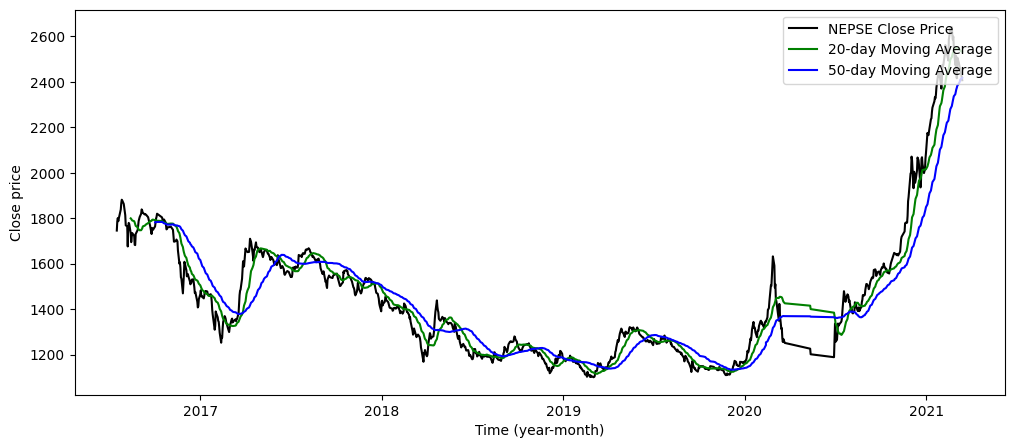

In [55]:
df = data.copy()
#fig = plt.figure(figsize = (15,4))
df['MA_20'] = df['Close'].rolling(20).mean()
df['MA_50'] = df['Close'].rolling(50).mean()


fig = plt.figure(figsize=(12,5))
fig.set(facecolor = "white")
plt.plot(df['Close'], 'k',label=['NEPSE Close Price'])
plt.plot(df['MA_20'],'g', label=['20-day MA'])
plt.plot(df['MA_50'],'b', label=['50-day MA'])

plt.legend(['NEPSE Close Price', '20-day Moving Average', '50-day Moving Average'], loc='upper right')
plt.title('')
plt.xlabel('Time (year-month)')
plt.ylabel('Close price')

fig.savefig(output_dir_path+'original_data_plus_moving_averages.png',dpi=800)
plt.show()

In [69]:
Scaled_data = Scaling(data)
print(Scaled_data.iloc[0:7,:])
X, y = create_time_series_dataset_pandas(Scaled_data, target_col='Close', time_step=3)
X_train, y_train, X_test, y_test = train_test_split(X, y, train_size=0.8)
print("Training Features (X_train):\n", X_train[0:7])
print("Training Targets (y_train):", y_train[0:7])
# print("Testing Features (X_test):\n", X_test)
# print("Testing Targets (y_test):", y_test)

       Open      High       Low     Close    Volume      MACD       RSI  \
0  0.394045  0.411250  0.405220  0.419000  0.087200  0.414759  0.745900   
1  0.411659  0.434650  0.425343  0.445530  0.110275  0.394676  0.831358   
2  0.437739  0.451690  0.451379  0.454545  0.111495  0.375338  0.851596   
3  0.446601  0.451703  0.449564  0.445693  0.133576  0.369176  0.750189   
4  0.437899  0.446165  0.447683  0.453480  0.121226  0.361885  0.777038   
5  0.445554  0.467730  0.460257  0.479237  0.182397  0.341350  0.843217   
6  0.470874  0.487159  0.485996  0.497428  0.226652  0.315911  0.874789   

        ATR       MFI       CPI      USDX   IR        TB     EFFR  RMT  \
0  0.264650  0.725950  0.019387  0.298415  1.0  0.054482  0.11611  0.0   
1  0.286283  0.692080  0.019387  0.298415  1.0  0.054482  0.11611  0.0   
2  0.290769  0.672762  0.019387  0.298415  1.0  0.054482  0.11611  0.0   
3  0.298310  0.554749  0.019387  0.298415  1.0  0.054482  0.11611  0.0   
4  0.298234  0.693533  0.0193

Open      1.566320e+03
High      1.569240e+03
Low       1.520630e+03
Close     1.539760e+03
Volume    2.593485e+07
MACD      1.773867e+02
RSI       9.387908e+01
ATR       5.882786e+01
MFI       8.854762e+01
CPI       2.579000e+01
USDX      1.935090e+01
IR        6.300000e+00
TB        5.690000e+00
EFFR      6.890000e+00
RMT       8.273300e+02
Score     7.281300e-01
dtype: float64


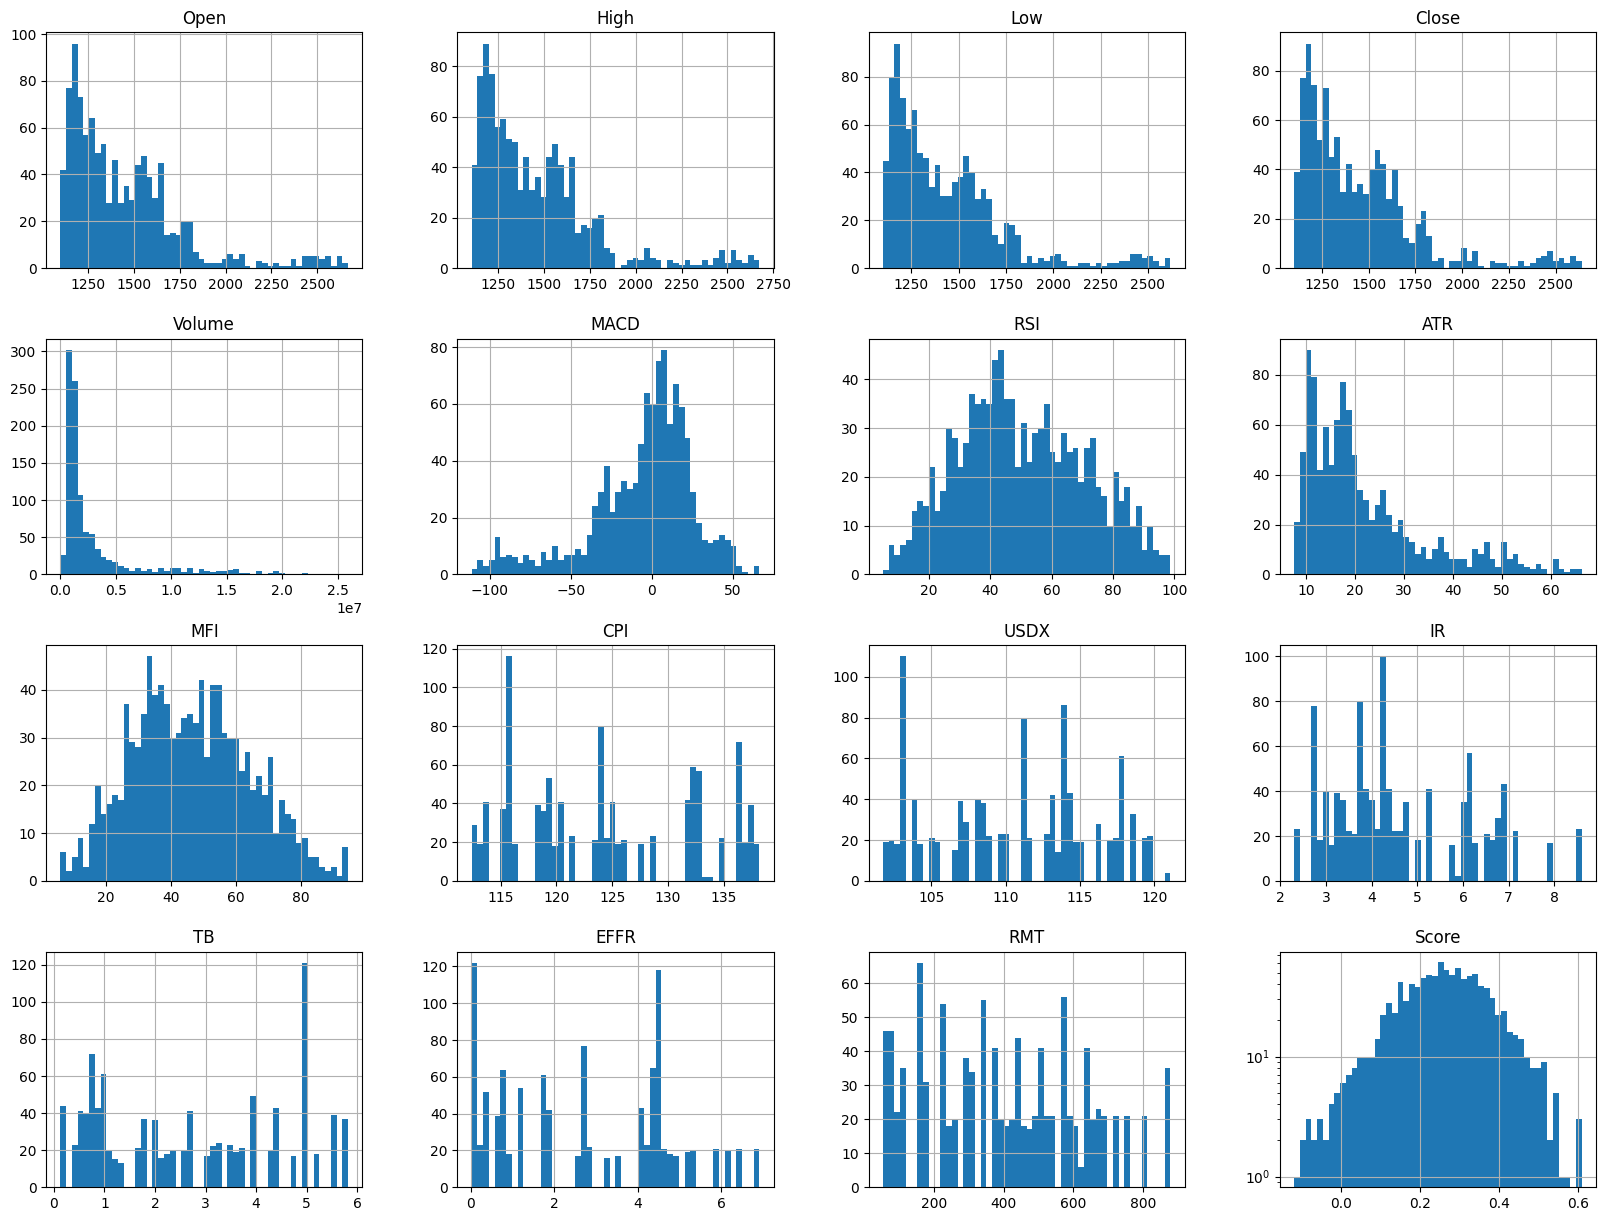

In [46]:
import matplotlib.pyplot as plt
print(data.max() - data.min())
data.hist(bins=50, figsize=(20, 15))
plt.yscale('log')
plt.show()


In [52]:
def Scaling(df, ct='None'):

  log_transformed_df, log_original_df,min_max_transformed_df, min_max_original_df = None, None, None, None

  if ct =='log':
      # Apply log transformation to the dataframe (handling zeros by adding 1)
      log_transformed_df = np.log(df + 1)
      # Inverse log transformation to return to the original scale
      log_original_df = np.exp(log_transformed_df) - 1

      return log_transformed_df, log_original_df

  elif ct == 'min_max':
      # Normalize the dataframe using Min-Max scaling
      min_val = df.min()
      max_val = df.max()
      min_max_transformed_df = (df - min_val) / (max_val - min_val)
      # Inverse Min-Max scaling to return to the original scale

      return min_max_transformed_df, min_max_transformed_df * (max_val - min_val) + min_val


